# Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Import

In [2]:
df = pd.read_csv("Sommerhus22/Sommerhus22_data.csv", sep=";")

## Datasortering/Forberedelse

In [3]:
amo = len(df)


def counter(arr,count_check):
    """
    En funktion der tæller hvor mange gange et bestemt element (count_check) 
    forekommer i et array (arr).
    """
    count_amo = 0
    for i in range(len(arr)):
        if arr[i] == count_check:
            count_amo += 1
    
    return count_amo

Laver en dictionary-template som indeholder alle spillere.

In [4]:
dict_temp = {}
for person in df:
    if person!="Melding":
        dict_temp[person] = 0


Arrays der indeholder antal spil spillet pr person:

In [5]:
game_amo_pp = dict_temp.copy()

for person in game_amo_pp:
    game_amo_pp[person] = amo - counter(df[person],0)

game_amo_pp


{'David': 74,
 'William': 61,
 'Sofus': 11,
 'Gustav': 79,
 'Johan': 48,
 'Samuel': 53,
 'Maria': 9}

Dictionaries der kun indeholder spil som hver enkelte person har deltaget i

In [6]:
gamedata_clean = dict_temp.copy()

for person in gamedata_clean:
    gamedata_clean[person] = df[person].loc[df[person]!=0]

# Statisikker

### Winning Streaks

In [7]:
def win_str_count(df):
    """
    En funktion der tæller hvor mange antal spil en given person har vundet i træk
    """

    max_win = 0
    count = 0

    for game_score in df:
        if game_score > 0:
            count += 1
        else:
            max_win = max(max_win,count)
            count = 0
    
    max_win = max(max_win,count)

    return max_win

Højeste winningstreak taget forbehold pauser mellem spil (dvs forekommer der spil hvor man ikke har deltaget, så resettes streaken)

In [8]:
dict_winstr_nop = dict_temp.copy()

for person in dict_winstr_nop:
    dict_winstr_nop[person] = win_str_count(df[person])

dict_winstr_nop

{'David': 7,
 'William': 9,
 'Sofus': 2,
 'Gustav': 5,
 'Johan': 4,
 'Samuel': 3,
 'Maria': 1}

Højeste winningstreak uden forbehold for pauser mellem spil (Nu ignorerers pauser mellem spil, dvs hvis man vinder et spil, sider over et par spil, og så vinder næste gang man spiller igen, så fortsætter streaken).

In [9]:
dict_winstr_incp = dict_temp.copy()

for person in dict_winstr_incp:
    dict_winstr_incp[person] = win_str_count(gamedata_clean[person])

dict_winstr_incp

{'David': 7,
 'William': 9,
 'Sofus': 2,
 'Gustav': 5,
 'Johan': 4,
 'Samuel': 3,
 'Maria': 2}

### Summarystatistikker over Point

In [10]:
avg = dict_temp.copy()
medians = dict_temp.copy()
stds = dict_temp.copy()
mins = dict_temp.copy()
maxs = dict_temp.copy()

for person in gamedata_clean:
    medians[person] = np.median(gamedata_clean[person])
    avg[person] = np.average(gamedata_clean[person])
    stds[person] = np.std(gamedata_clean[person])
    mins[person] = np.min(gamedata_clean[person])
    maxs[person] = np.max(gamedata_clean[person])

Gennemsnitscore

In [11]:
avg

{'David': 0.11851351351351354,
 'William': -0.11999999999999997,
 'Sofus': 0.08181818181818185,
 'Gustav': 0.003797468354430369,
 'Johan': 0.04541666666666669,
 'Samuel': -0.10754716981132076,
 'Maria': 0.13}

Medianscore

In [12]:
medians

{'David': 0.15000000000000002,
 'William': -0.1,
 'Sofus': -0.1,
 'Gustav': 0.2,
 'Johan': 0.2,
 'Samuel': -0.2,
 'Maria': -0.1}

Spredning af point

In [13]:
stds

{'David': 0.9405614804285969,
 'William': 1.0632844259612775,
 'Sofus': 0.6965084112501074,
 'Gustav': 0.9635355567427261,
 'Johan': 0.9873089653475023,
 'Samuel': 0.9252942533714228,
 'Maria': 0.6901529621113794}

Laveste score

In [14]:
mins

{'David': -1.6,
 'William': -3.0,
 'Sofus': -1.0,
 'Gustav': -3.2,
 'Johan': -3.2,
 'Samuel': -2.4,
 'Maria': -0.8}

Højeste score

In [15]:
maxs

{'David': 3.2,
 'William': 3.2,
 'Sofus': 1.0,
 'Gustav': 2.4,
 'Johan': 2.4,
 'Samuel': 2.7,
 'Maria': 1.2}

Boxplots

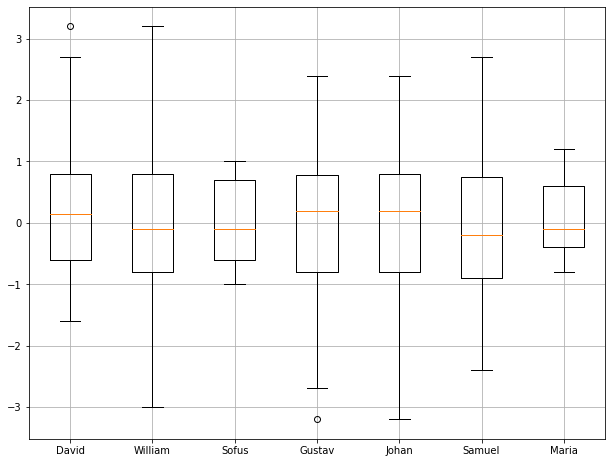

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.boxplot(gamedata_clean.values())
ax.set_xticklabels(gamedata_clean.keys())
plt.grid()
plt.show()

In [67]:
def melding_format(df):
    """
    Returnerer et array som sorterer meldingerne ind i to arrays:
    En som indholder meldingen, og et andet som indeholder udfaldet af spillet.
    Fx hvis man i første indgang har "9g" og i den anden "-2", betyder det man har meldt
    9 gode, og efterfølgende har tabt med 2 stik.

    OBS: Ved hhv Sol og Ren sol indikerer 1 og -1 om spilleren der har meldt sol enten vandt
    eller tabte meldingen.
    
    """

    arr = df["Melding"]

    mel1 = np.zeros_like(arr)
    mel2 = np.zeros_like(arr)

    count = 0

    for melding in arr:
        mel_split = melding.split(",")

        mel1[count] = mel_split[0]

        if len(mel_split) > 1:
            if mel_split[1][-1] == "o":
                mel2[count] = int(mel_split[1][-2])
            elif mel_split[1][-1] == "u":
                mel2[count] = -int(mel_split[1][-2])
        
        else:
            if (df.iloc[count][1:] > 0).sum() == 3:
                mel2[count] = -1
            else:
                mel2[count] = 1

        count += 1
    
    d = {'Melding': mel1, 'Resultat': mel2}

    return pd.DataFrame(data=d)

,Melding,Resultat
0,9g,-3
1,9v3,1
2,Rsol,1
3,10,-1
4,Rsol,1
...,...,...
79,9h,1
80,9g,2
81,9g,2
82,9g,2


In [63]:
bob = df.iloc[1][1:]


(df.iloc[1][1:] > 0).sum()

2

# Idéer til statistikker

Statistik pr personn:
- Højeste winning streak
- Medianscore
- Gennemsnitlig højeste melding
- Antal spil spillet
- Antal/procent spil tabt/vundet
- Hvem vandt relativt flest spil, hvor de fik flere stik end meldt

Statistik pr makkerpar:
- Den bedste kombination af makkerpar ifht antal vundene spil, pointscore
- Den mest hyppige kombi af makkerpar (påvis/debunk the Gutsab-Scmulduo)
